In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
data = pd.DataFrame(data=boston.data, columns=boston.feature_names)
data['MEDV'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Метод градиентного спуска

In [17]:
class GDRegressor:

    def __init__(self, alpha=0.01, n_iter=100):
        self.alpha = alpha
        self.n_iter = n_iter

    def fit(self, X, y):
        #X = X.copy()
        #X.insert(0, "Ones", np.ones(len(X)))
        X = np.hstack([np.ones((len(X), 1)), X])
        theta = np.zeros(X.shape[1])
        self.theta_history = theta.copy()
        m = len(X)

        for i in range(self.n_iter):
            error = np.matmul(X, theta) - y
            gradient = (1/m) * np.matmul(X.T, error)
            theta -= self.alpha * gradient
            self.theta_history = np.vstack([self.theta_history, theta])
        
        self.theta = theta
        self.intercept_ = theta[0]
        self.coef_ = theta[1:]

    def predict(self, X_test):
        #X_test = X_test.copy()
        #X_test.insert(0, "Ones", np.ones(len(X_test)))
        X_test = np.hstack([np.ones((len(X_test), 1)), X_test])
        return X_test.dot(self.theta)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = data[["RM"]]
y = data["MEDV"]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=18)

In [18]:
model = GDRegressor(alpha=0.04, n_iter=2000)
%time model.fit(X_train, Y_train)

CPU times: user 599 ms, sys: 3.21 ms, total: 602 ms
Wall time: 331 ms


In [19]:
model.coef_, model.intercept_

(array([7.07554766]), -21.792447302876596)

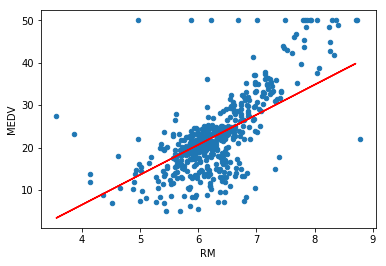

In [23]:
data.plot(kind='scatter', x="RM", y="MEDV")
plt.plot(X_train, model.coef_[0] * X_train + model.intercept_, 'r')

## Оценка качества модели

In [25]:
def rmse(y_hat, y):
    """ Root mean squared error """
    errors = y_hat - y
    total_error = np.dot(errors, errors)
    return np.sqrt(total_error/len(y_hat))

def r_squared(y_hat, y):
    """ R-squared score """
    return 1.0 - sum((y - y_hat)**2) / sum((y - np.mean(y))**2)


In [26]:
Y_pred = model.predict(X_test)
rmse(Y_pred, Y_test)

6.500256917031142

In [27]:
r_squared(Y_pred, Y_test)

0.48822629468823386

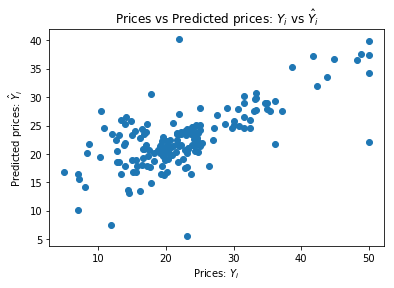

In [28]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$");

## Нормализация значений

In [29]:
def z_scaler(feature):
    return (feature - feature.mean()) / feature.std()

In [30]:
X_scaled = z_scaler(X)

In [31]:
y_scaled = z_scaler(y)

In [32]:
plot_cost_function(X_scaled, y_scaled, GDRegressor, max_iters=300, eta0=0.04)

NameError: name 'plot_cost_function' is not defined